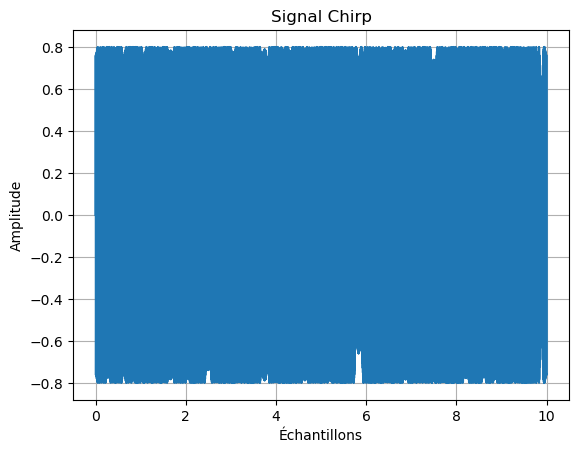

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def generate_chirp_signal(N, f_start, f_end, duration, sampling_rate):
    t = np.arange(duration*sampling_rate)/sampling_rate
    chirp_signal = .8*np.sin(2 * np.pi * np.linspace(f_start, f_end, len(t)) * t)
    return chirp_signal

# Paramètres du signal chirp
N = 1000  # Taille du signal
f_start = 100  # Fréquence de départ en Hz
f_end = 300  # Fréquence de fin en Hz
duration = 10.0  # Durée du signal en secondes
sampling_rate = 1000  # Fréquence d'échantillonnage en Hz

# Générer le signal chirp
chirp_signal = generate_chirp_signal(N, f_start, f_end, duration, sampling_rate)

# Afficher le signal chirp
t = np.arange(len(chirp_signal))/sampling_rate
plt.plot(t,chirp_signal)
plt.title('Signal Chirp')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)

import sounddevice as sd
sd.play(chirp_signal,sampling_rate)



(array([[5.93252918e-12, 2.85552403e-12, 7.81580625e-12, ...,
         1.50272881e-18, 2.52627367e-17, 2.49046721e-18],
        [1.21385541e-11, 5.84452197e-12, 1.60501574e-11, ...,
         1.39724728e-17, 5.01860310e-17, 5.18851742e-18],
        [1.29840296e-11, 6.26028802e-12, 1.73423978e-11, ...,
         4.69085311e-17, 4.91773477e-17, 5.83142141e-18],
        ...,
        [4.58955912e-15, 1.96333283e-15, 4.16155679e-16, ...,
         7.10349526e-04, 2.40125772e-02, 3.71387501e-02],
        [4.57112036e-15, 1.87793733e-15, 3.95262323e-16, ...,
         3.73088264e-05, 1.74436918e-03, 3.33697735e-02],
        [2.28249014e-15, 9.24767275e-16, 1.94166208e-16, ...,
         3.22345851e-06, 1.51326772e-04, 5.04037707e-04]]),
 array([  0.     ,   3.90625,   7.8125 ,  11.71875,  15.625  ,  19.53125,
         23.4375 ,  27.34375,  31.25   ,  35.15625,  39.0625 ,  42.96875,
         46.875  ,  50.78125,  54.6875 ,  58.59375,  62.5    ,  66.40625,
         70.3125 ,  74.21875,  78.125  ,  8

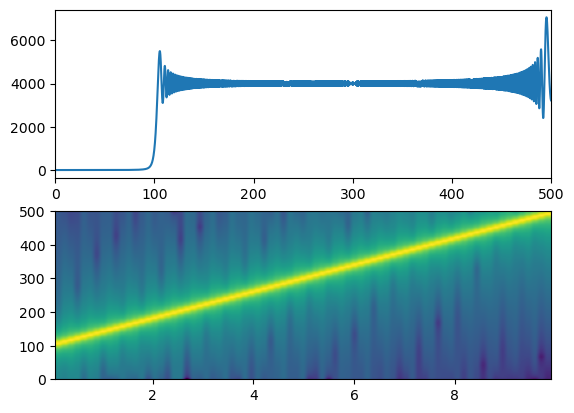

In [25]:
from numpy.fft import fft

TF = fft(chirp_signal)
spectre = np.abs(TF)**2
Nf = len(TF)
f = np.arange(Nf)*sampling_rate/Nf

plt.subplot(211)
plt.plot(f,spectre)
plt.xlim((0,sampling_rate//2))

plt.subplot(212)
plt.specgram(chirp_signal,Fs=sampling_rate)

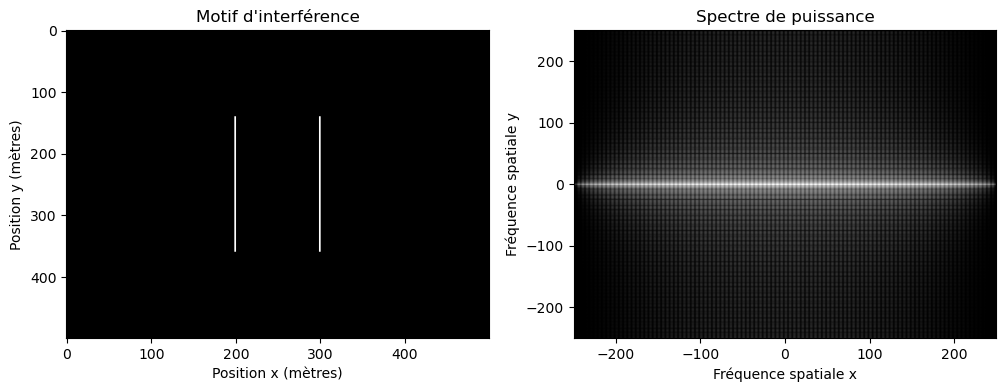

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

# Définir les coordonnées spatiales
x_min, x_max = -0.02, 0.02  # Plage en x
y_min, y_max = -0.02, 0.02  # Plage en y

# Nombre de points dans chaque direction
num_points = 500

# Créer le meshgrid
x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)


num_points2 = num_points//2
Masque = np.zeros((num_points, num_points))
dec = 50
L = 100
l = 1
Masque[num_points2-10-L:num_points2+10+L ,num_points2-l-dec:num_points2+l-dec] = 1
Masque[num_points2-10-L:num_points2+10+L ,num_points2-l+dec:num_points2+l+dec] = 1

# Masque = np.sqrt(X**2+Y**2) 
# Masque = Masque < 0.001

# Effectuer la transformée de Fourier 2D
fft_result = fft2(Masque)

# Centrer le résultat de la transformée de Fourier
fft_result_shifted = fftshift(fft_result)

# Calculer la densité spectrale de puissance (DSP)
power_spectrum = np.abs(fft_result_shifted)**2

# Afficher le motif d'interférence et son spectre de puissance
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Afficher le motif d'interférence
axes[0].imshow(Masque, cmap='gray', aspect='auto')
axes[0].set_title('Motif d\'interférence')
axes[0].set_xlabel('Position x (mètres)')
axes[0].set_ylabel('Position y (mètres)')

# Afficher le spectre de puissance
axes[1].imshow(np.log(power_spectrum + 1), cmap='gray', extent=[-num_points/2, num_points/2, -num_points/2, num_points/2], aspect='auto')
axes[1].set_title('Spectre de puissance')
axes[1].set_xlabel('Fréquence spatiale x')
axes[1].set_ylabel('Fréquence spatiale y')

plt.show()
